Project Steps
Data Cleaning
• Load the dataset into a Pandas DataFrame.
• Identify and handle missing values:
o Use appropriate strategies such as mean/median imputation or
forward/backward fill.
o Document your chosen strategies.
• Correct data types and standardize formats.
• Address any inconsistent or erroneous data entries.
Exploratory Data Analysis (EDA)
• Perform EDA to understand the dataset
o Generate descriptive statistics.
o Create visualizations such as histograms, bar charts, box plots, and
correlation matrices.
• Document your findings and key patterns.
Outlier Detection and Removal
Data Science  Project-1
• Detect outliers using methods such as Z-score, IQR, or visualization
techniques.
• Develop a function to handle outliers appropriately (e.g., removing or
capping them).
• Document your approach and its impact on the dataset.
Manual Data Splitting
• Manually split the cleaned dataset into training and testing sets (like 80/20
split).
Model Training
• Train a K-Nearest Neighbors (KNN) model on the training set using manual
splitting.
• Implement cross-validation to train model again and assess the performance
of the KNN model.
Model Evaluation
• Evaluate the KNN model using metrics such as accuracy, precision, recall,
F1-score, and ROC-AUC.
• Compare the results from the manual split with those from cross-validation.
• Create visualizations like confusion matrices and ROC curves to illustrate
model performance.

SOURCE: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

**Data Preprocessing**

In [3]:
file_path = '/content/drive/MyDrive/web3gle/Project 1/loan_approval_dataset.csv'
df = pd.read_csv(file_path)
print(df.head)
print(df.shape)
print(df.dtypes)
print(df.info())

# Checking for null values
null_values = df.isnull().sum()
print("Null Values in each column:\n", null_values)

# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:\n", duplicate_rows)

# Normalize Column names
print(df.columns)
df.columns = df.columns.str.strip()
# Check column names again to confirm
print(df.columns)

#Normalize categorical data
# Print unique values in the columns to confirm
print("Unique values in 'education':", df['education'].unique())
#normalize the catogrical cols
df['education'] = df['education'].str.strip().str.lower()
df['self_employed'] = df['self_employed'].str.strip().str.lower()
df['loan_status'] = df['loan_status'].str.strip().str.lower()
# Print unique values after normalization to verify
#print("Unique values in 'education' after normalization:", df['education'].unique())
# Apply conversion based on normalized values
df['education'] = df['education'].apply(lambda x: 1 if x == 'graduate' else 0)
df['self_employed'] = df['self_employed'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'approved' else 0)

print("First few rows of the DataFrame:\n", df.head)

#check datatypes again
print(df.dtypes)


<bound method NDFrame.head of       loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000  

**Perform EDA**

Descriptive Statistics:
           loan_id  no_of_dependents    education  self_employed  \
count  4269.000000       4269.000000  4269.000000    4269.000000   
mean   2135.000000          2.498712     0.502225       0.503631   
std    1232.498479          1.695910     0.500054       0.500045   
min       1.000000          0.000000     0.000000       0.000000   
25%    1068.000000          1.000000     0.000000       0.000000   
50%    2135.000000          3.000000     1.000000       1.000000   
75%    3202.000000          4.000000     1.000000       1.000000   
max    4269.000000          5.000000     1.000000       1.000000   

       income_annum   loan_amount    loan_term  cibil_score  \
count  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean   5.059124e+06  1.513345e+07    10.900445   599.936051   
std    2.806840e+06  9.043363e+06     5.709187   172.430401   
min    2.000000e+05  3.000000e+05     2.000000   300.000000   
25%    2.700000e+06  7.700000e+06     6.000000  

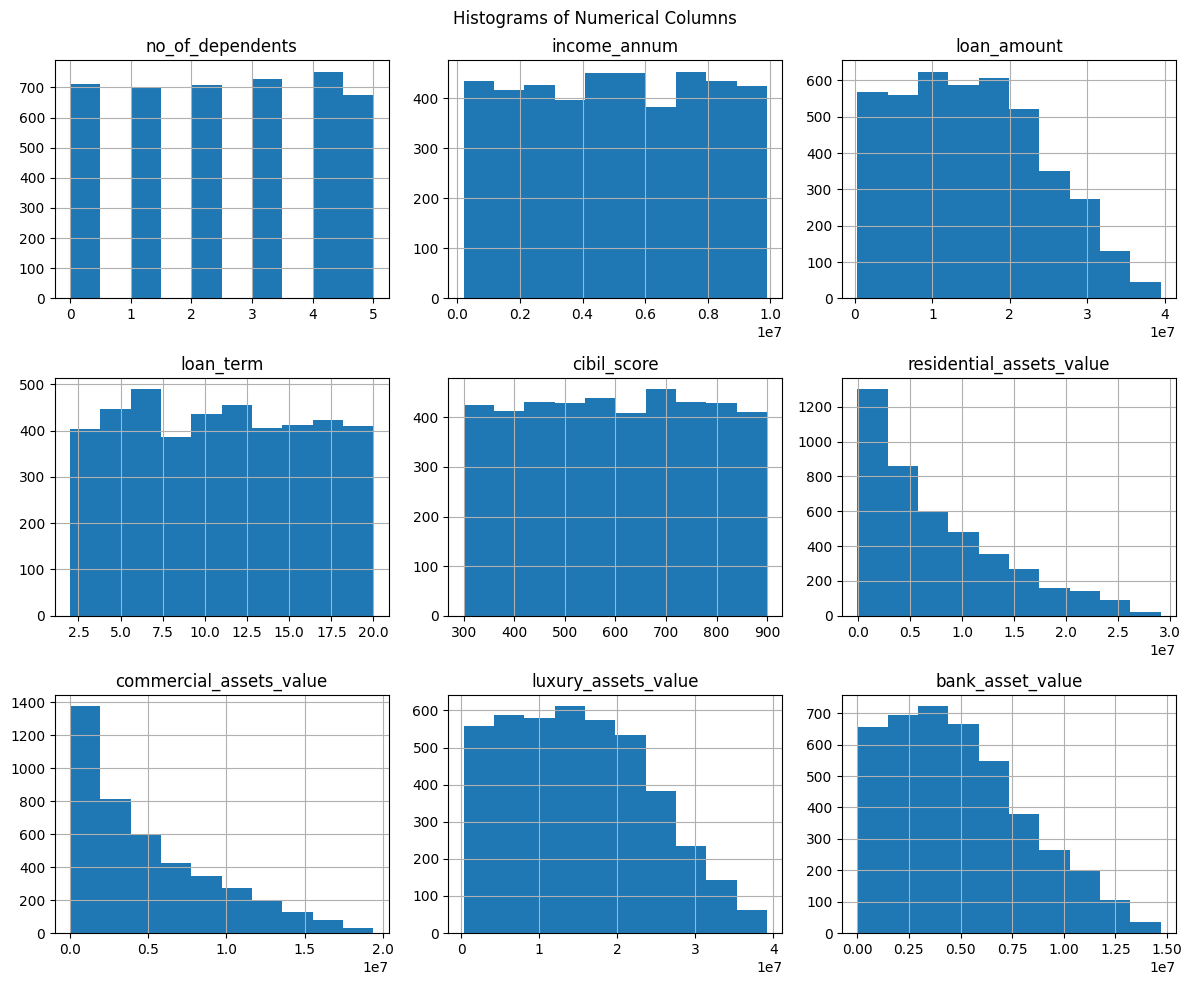

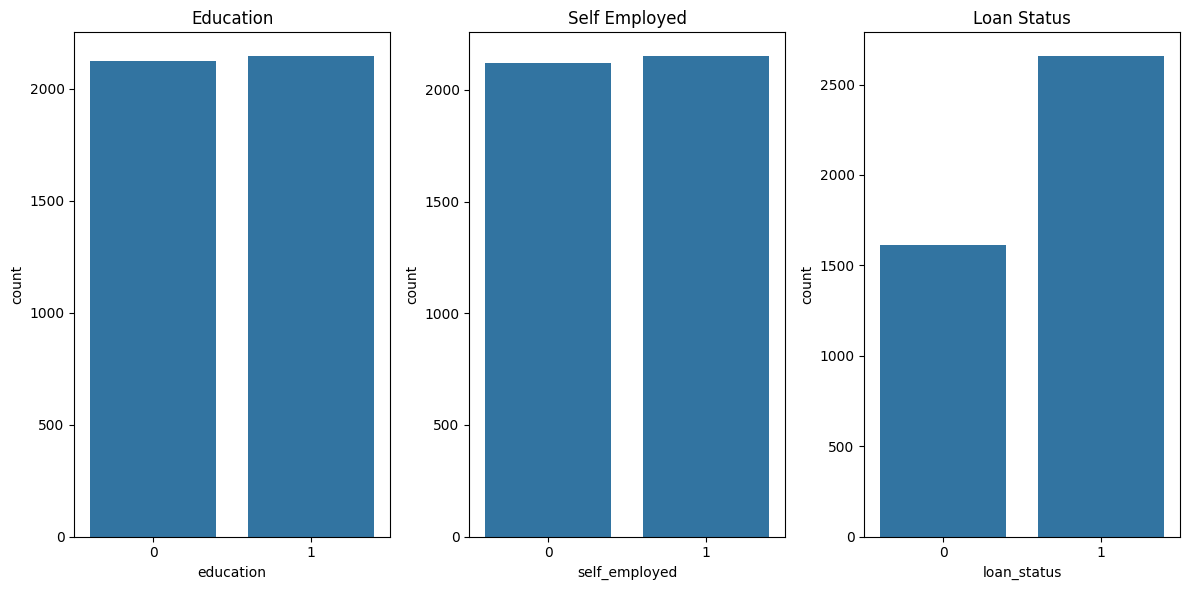

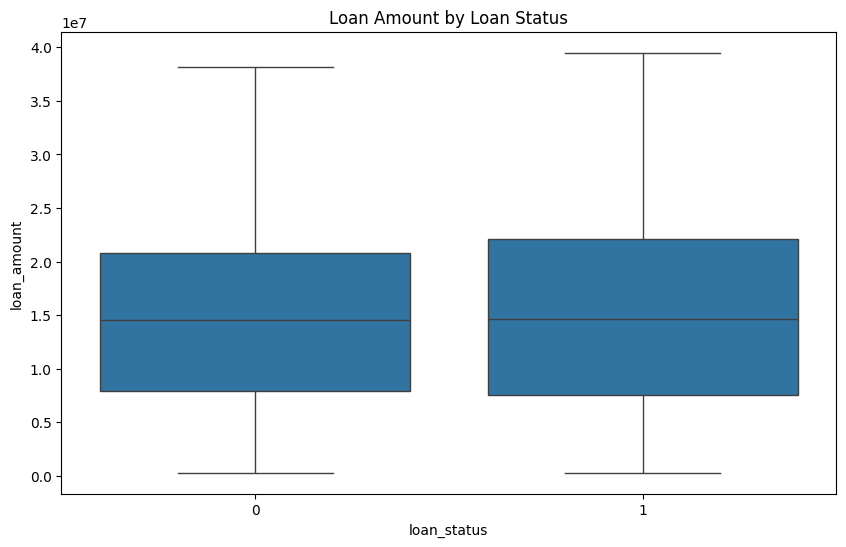

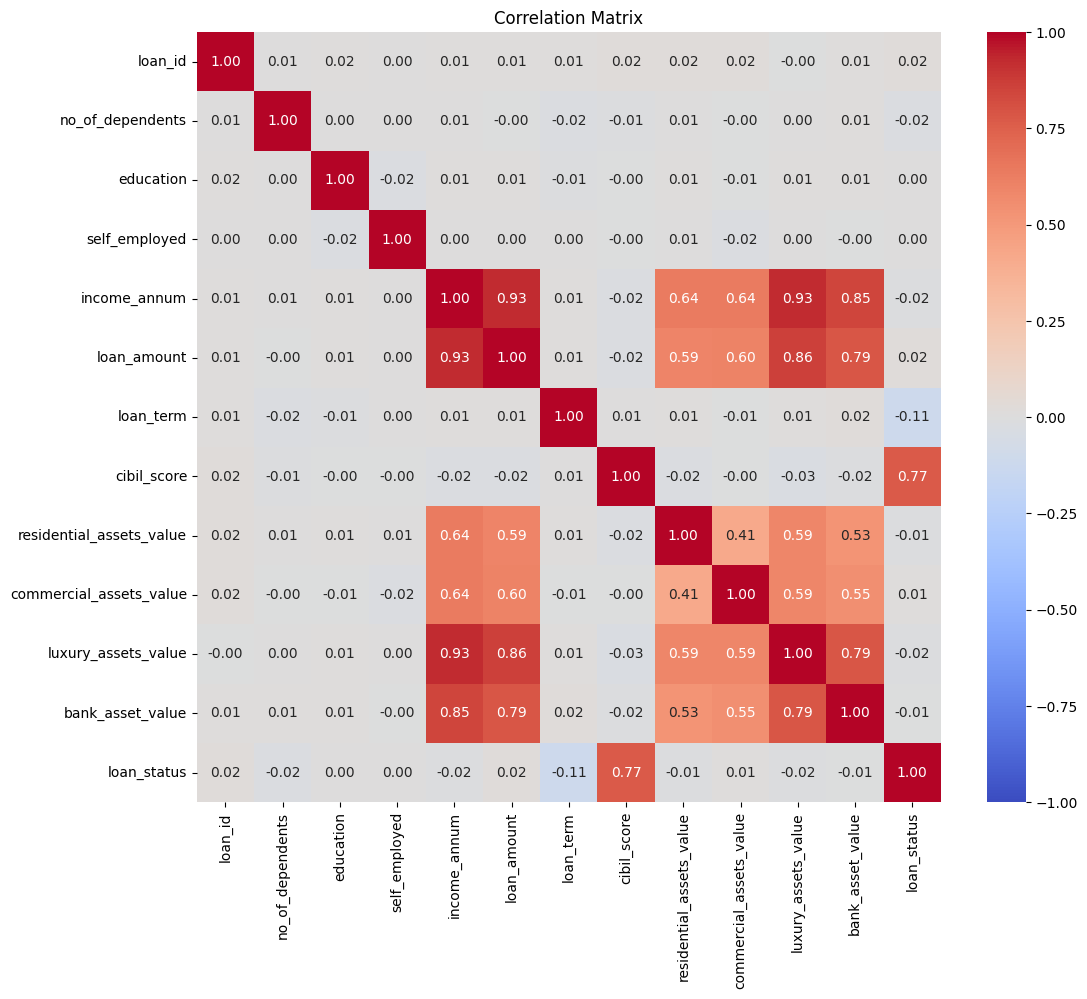

In [4]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Histograms of Numerical Columns
num_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
            'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
df[num_cols].hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.tight_layout()
plt.show()

# Bar Charts for Categorical Columns
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='education', data=df)
plt.title('Education')

plt.subplot(1, 3, 2)
sns.countplot(x='self_employed', data=df)
plt.title('Self Employed')

plt.subplot(1, 3, 3)
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status')

plt.tight_layout()
plt.show()

# Box plot for loan_amount by loan_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title('Loan Amount by Loan Status')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Insights**

=income_annum ranges from 200,000 to 9,900,000

=*loan_amount ranges from 300,000 to 39,500,000*

=income_annum and loan_amount have a very high mean and standard deviation, indicating a wide range of values and potential outliers.

=50% of applicants have no_of_dependents of 3 or less, with a maximum of 5

=*loan_term has a median of 10 months, with loans ranging from 2 to 20 months.*

**Correlation**

=*income_annum and loan_amount have a strong positive correlation of 0.93, suggesting that higher income applicants tend to apply for larger loans.*

=luxury_assets_value and income_annum also show a strong positive correlation of 0.93, indicating that applicants with higher incomes possess more luxury assets.

=luxury_assets_value and loan_amount correlate strongly at 0.86, implying that applicants with more luxury assets tend to apply for larger loans.

=income_annum and bank_asset_value correlate strongly at 0.85, suggesting a link between income and bank assets.


**Checking for Outliers**

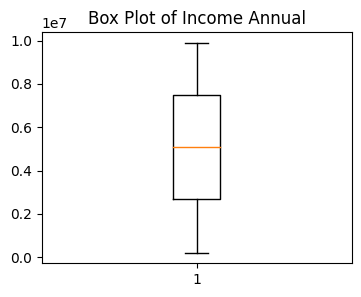

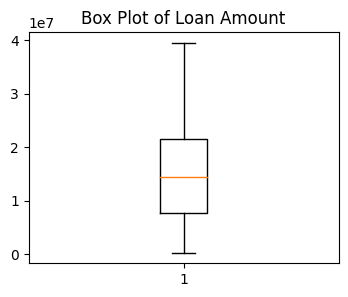

Outliers in income_annum:
Series([], Name: income_annum, dtype: int64)

Outliers in loan_amount:
Series([], Name: loan_amount, dtype: int64)
Outliers in income_annum using IQR method:
Empty DataFrame
Columns: [loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []

Outliers in loan_amount using IQR method:
Empty DataFrame
Columns: [loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []


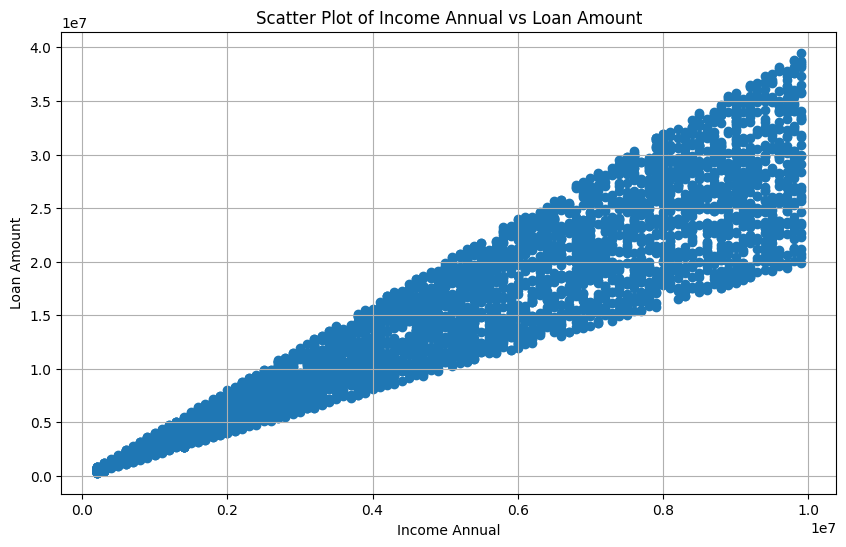

In [5]:
plt.figure(figsize=(4, 3))
plt.boxplot(df['income_annum'])
plt.title('Box Plot of Income Annual')
plt.show()

plt.figure(figsize=(4, 3))
plt.boxplot(df['loan_amount'])
plt.title('Box Plot of Loan Amount')
plt.show()

# Calculate Z-scores for income_annum and loan_amount
z_scores_income = stats.zscore(df['income_annum'])
z_scores_loan_amount = stats.zscore(df['loan_amount'])

# Find outliers based on Z-score threshold
outliers_income = df['income_annum'][np.abs(z_scores_income) > 3]
outliers_loan_amount = df['loan_amount'][np.abs(z_scores_loan_amount) > 3]

print("Outliers in income_annum:")
print(outliers_income)
print("\nOutliers in loan_amount:")
print(outliers_loan_amount)

# Calculate Q1 and Q3
Q1_income = df['income_annum'].quantile(0.25)
Q3_income = df['income_annum'].quantile(0.75)
IQR_income = Q3_income - Q1_income

Q1_loan_amount = df['loan_amount'].quantile(0.25)
Q3_loan_amount = df['loan_amount'].quantile(0.75)
IQR_loan_amount = Q3_loan_amount - Q1_loan_amount

# Find outliers based on IQR threshold
outliers_income_iqr = df[(df['income_annum'] < Q1_income - 1.5 * IQR_income) | (df['income_annum'] > Q3_income + 1.5 * IQR_income)]
outliers_loan_amount_iqr = df[(df['loan_amount'] < Q1_loan_amount - 1.5 * IQR_loan_amount) | (df['loan_amount'] > Q3_loan_amount + 1.5 * IQR_loan_amount)]

print("Outliers in income_annum using IQR method:")
print(outliers_income_iqr)
print("\nOutliers in loan_amount using IQR method:")
print(outliers_loan_amount_iqr)


plt.figure(figsize=(10, 6))
plt.scatter(df['income_annum'], df['loan_amount'])
plt.title('Scatter Plot of Income Annual vs Loan Amount')
plt.xlabel('Income Annual')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()


**Manual Data Split**

Metrics on test set (manual split):
Accuracy: 0.5972
Precision: 0.6732
Recall: 0.7387
F1-score: 0.7045
ROC-AUC: 0.5504


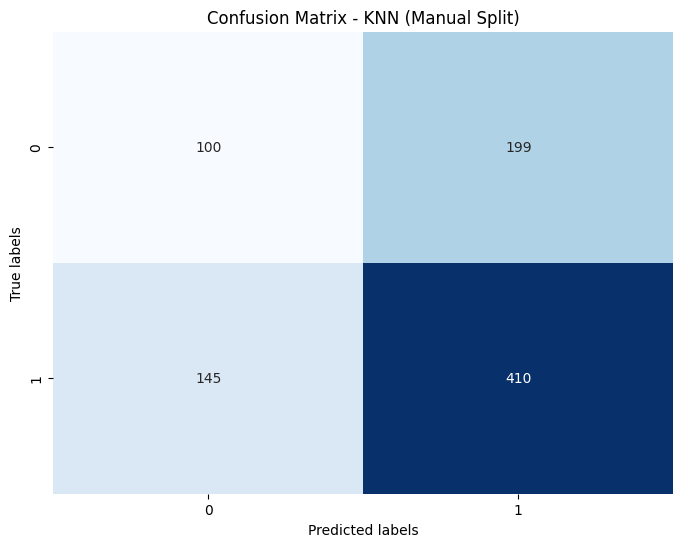

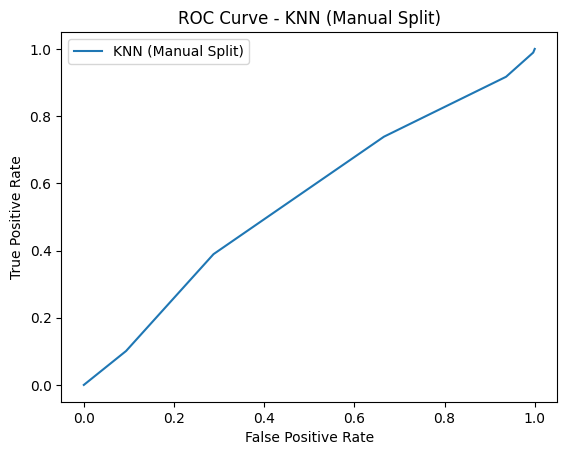

In [12]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your cleaned DataFrame
# Manually split the dataset (80% training, 20% testing)
train_size = int(0.8 * len(df))
X = df.drop('loan_status', axis=1)
y = df['loan_status']
x_train_manual = X.iloc[:train_size, :]
y_train_manual = y.iloc[:train_size]
x_test_manual = X.iloc[train_size:, :]
y_test_manual = y.iloc[train_size:]

# Initialize the KNN classifier
knn_manual = KNeighborsClassifier(n_neighbors=5)
# Train the model on the training set
knn_manual.fit(x_train_manual, y_train_manual)
# Predict on the test set
y_pred_manual = knn_manual.predict(x_test_manual)

# Evaluate the model
accuracy_manual = accuracy_score(y_test_manual, y_pred_manual)
precision_manual = precision_score(y_test_manual, y_pred_manual)
recall_manual = recall_score(y_test_manual, y_pred_manual)
f1_manual = f1_score(y_test_manual, y_pred_manual)
roc_auc_manual = roc_auc_score(y_test_manual, knn_manual.predict_proba(x_test_manual)[:, 1])

print("Metrics on test set (manual split):")
print(f"Accuracy: {accuracy_manual:.4f}")
print(f"Precision: {precision_manual:.4f}")
print(f"Recall: {recall_manual:.4f}")
print(f"F1-score: {f1_manual:.4f}")
print(f"ROC-AUC: {roc_auc_manual:.4f}")

# Confusion Matrix
cm_manual = confusion_matrix(y_test_manual, y_pred_manual)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN (Manual Split)')
plt.show()

# ROC Curve
fpr_manual, tpr_manual, thresholds_manual = roc_curve(y_test_manual, knn_manual.predict_proba(x_test_manual)[:, 1])
plt.plot(fpr_manual, tpr_manual, label='KNN (Manual Split)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (Manual Split)')
plt.legend()
plt.show()


**Data split Cross Validation**


In [17]:
from sklearn.model_selection import cross_val_score

# Assume df is your cleaned DataFrame
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Initialize the KNN classifier
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Cross-validation
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# For evaluation metrics, you typically would not use cross-validation for confusion matrix or ROC curves directly.
# However, if you want to see ROC AUC for each fold:
roc_auc_cv = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')
print("Cross-validation ROC-AUC scores:", roc_auc_cv)
print("Mean cross-validation ROC-AUC score:", roc_auc_cv.mean())


Cross-validation scores: [0.55620609 0.55269321 0.56206089 0.55503513 0.58499414]
Mean cross-validation score: 0.5621978908989075
Cross-validation ROC-AUC scores: [0.50222412 0.49268569 0.5218001  0.50817139 0.54541999]
Mean cross-validation ROC-AUC score: 0.5140602553190794


The ROC-AUC from the manual split (0.5504) is slightly higher than the mean ROC-AUC from cross-validation (0.5141). This metric shows the trade-off between true positive rate and false positive rate. The scores being close to 0.5 indicate that the model is performing only slightly better than random guessing in terms of distinguishing between classes.

(stratified K-fold cross-validation)
**DONE**

In [19]:

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


**Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.57      0.11      0.18       318
           1       0.64      0.95      0.77       536

    accuracy                           0.64       854
   macro avg       0.60      0.53      0.47       854
weighted avg       0.61      0.64      0.55       854

Accuracy of Logistic Regression is :  0.6370023419203747


**Decision Tree**

In [27]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Decision Tree is :  0.9754098360655737
